In [3]:

extract_path = "/home/DSE423/Documents/FL Project/Data"


In [4]:
import os

# Path to your extracted data
base_dir = "/home/DSE423/Documents/FL Project/Data"

# Define valid image extensions (to ignore stray files)
valid_exts = ('.jpg', '.jpeg', '.png', '.nii', '.gz')

# Count images in each subfolder
for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        count = sum(
            1 for file in os.listdir(folder_path)
            if file.lower().endswith(valid_exts)
        )
        print(f"{folder}: {count} images")


Mild Dementia: 5002 images
Moderate Dementia: 488 images
Non Demented: 67222 images
Very mild Dementia: 13725 images


In [5]:
import os
import pandas as pd

# Path to your dataset
# Updated to your local Mac path
base_dir = "/home/DSE423/Documents/FL Project/Data"

# Supported image extensions
valid_exts = ('.jpg', '.jpeg', '.png', '.tif', '.tiff')

data_records = []

# Walk through folders
print(f"Searching for images in: {base_dir}")
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.lower().endswith(valid_exts):
            label = os.path.basename(root)  # Folder name = label
            file_path = os.path.join(root, file)
            data_records.append((file_path, label))

print(f"Found {len(data_records)} images.")

# Create a DataFrame
df = pd.DataFrame(data_records, columns=["image_path", "label"])

# After creating df (DataFrame of all images)
df_small = (
    df.groupby("label", group_keys=False)
      .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class
      .reset_index(drop=True)
)




# Save CSV to local folder
# Updated to your local Mac path
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"
df.to_csv(manifest_path, index=False)

print("✅ Manifest created successfully!")
print(f"📸 Total images found: {len(df)}")
print(f"💾 Saved to: {manifest_path}")
print("\nSample rows:")
print(df.head())

Searching for images in: /home/DSE423/Documents/FL Project/Data
Found 86437 images.
✅ Manifest created successfully!
📸 Total images found: 86437
💾 Saved to: /home/DSE423/Documents/FL Project/manifest.csv

Sample rows:
                                          image_path              label
0  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
1  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
2  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
3  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia
4  /home/DSE423/Documents/FL Project/Data/Moderat...  Moderate Dementia


/tmp/ipykernel_357239/1477990416.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.1, random_state=42))  # take 10% from each class


✅ Total images: 86437

📊 Images per class:
label
Non Demented          67222
Very mild Dementia    13725
Mild Dementia          5002
Moderate Dementia       488
Name: count, dtype: int64


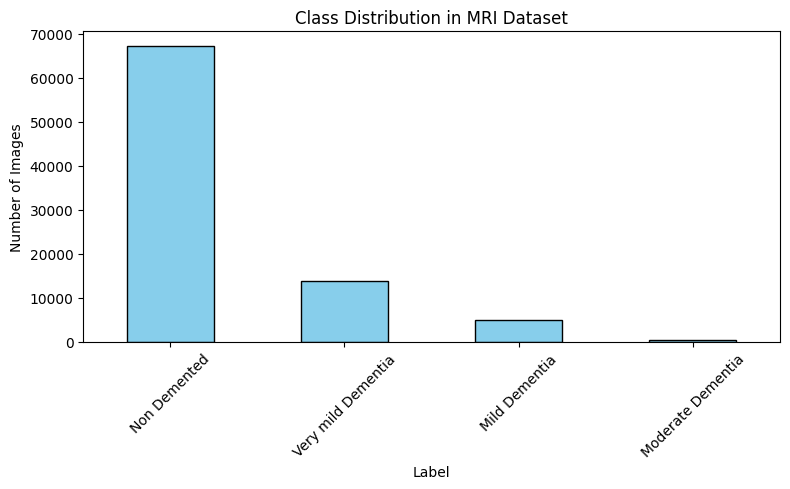

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the manifest
# Updated to your local Mac path
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"

df = pd.read_csv(manifest_path)

# Check total images
print(f"✅ Total images: {len(df)}\n")

# Check number of images per class
print("📊 Images per class:")
print(df['label'].value_counts())

# Plot class distribution
plt.figure(figsize=(8, 5))
df['label'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution in MRI Dataset")
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import KFold  # <-- CHANGED: Import KFold
import os

# Path to your manifest file (using the 10% subset)
# Make sure this points to 'manifest_small.csv' to keep the workload light
manifest_path = "/home/DSE423/Documents/FL Project/manifest.csv"

# Read the manifest
df = pd.read_csv(manifest_path)

# Number of clients
num_clients = 10

# Output directory for client splits
output_dir = "/home/DSE423/Documents/FL Project/client_splits"
os.makedirs(output_dir, exist_ok=True)

# Create random folds using KFold
# <-- CHANGED: Replaced StratifiedKFold with KFold
kf = KFold(n_splits=num_clients, shuffle=True, random_state=42)

# <-- CHANGED: The loop no longer needs df['label']
for i, (_, test_idx) in enumerate(kf.split(df)):
    client_df = df.iloc[test_idx]
    client_path = os.path.join(output_dir, f"client_{i+1}.csv")
    client_df.to_csv(client_path, index=False)
    print(f"✅ Saved: {client_path} | Samples: {len(client_df)}")

print("\n🎉 Data successfully split into 10 RANDOM clients!")

✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_1.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_2.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_3.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_4.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_5.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_6.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_7.csv | Samples: 8644
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_8.csv | Samples: 8643
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_9.csv | Samples: 8643
✅ Saved: /home/DSE423/Documents/FL Project/client_splits/client_10.csv | Samples: 8643

🎉 Data successfully split into 10 RANDOM clients!


In [9]:
import pandas as pd
import os

# Updated to your local Mac path
split_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Go through each client CSV and print class distribution
for file in sorted(os.listdir(split_dir)):
    if file.endswith(".csv"):
        client_df = pd.read_csv(os.path.join(split_dir, file))
        print(f"\n📁 {file}")
        print(client_df['label'].value_counts())


📁 client_1.csv
label
Non Demented          6747
Very mild Dementia    1365
Mild Dementia          487
Moderate Dementia       45
Name: count, dtype: int64

📁 client_10.csv
label
Non Demented          6686
Very mild Dementia    1422
Mild Dementia          482
Moderate Dementia       53
Name: count, dtype: int64

📁 client_2.csv
label
Non Demented          6756
Very mild Dementia    1315
Mild Dementia          516
Moderate Dementia       57
Name: count, dtype: int64

📁 client_3.csv
label
Non Demented          6706
Very mild Dementia    1377
Mild Dementia          520
Moderate Dementia       41
Name: count, dtype: int64

📁 client_4.csv
label
Non Demented          6766
Very mild Dementia    1324
Mild Dementia          504
Moderate Dementia       50
Name: count, dtype: int64

📁 client_5.csv
label
Non Demented          6781
Very mild Dementia    1348
Mild Dementia          460
Moderate Dementia       55
Name: count, dtype: int64

📁 client_6.csv
label
Non Demented          6715
Very mild Deme

In [10]:
# Step 1: Imports
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

# Step 2: Define a common preprocessing transform
# (This will be identical for every client)
common_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),     # ensure grayscale
    transforms.Resize((224, 224)),                   # resize to 224x224
    transforms.ToTensor(),                           # convert to tensor [0,1]
    transforms.Normalize(mean=[0.5], std=[0.5])      # normalize to [-1,1]
])

print("✅ Libraries imported and transform ready for all clients.")


✅ Libraries imported and transform ready for all clients.


In [11]:
# Step 3: Define custom dataset for each client
class MRIDataset(Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

        # Create a label mapping so each class becomes a number
        self.label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label_name = self.data.iloc[idx, 1]
        label = self.label_map[label_name]

        # Open image in grayscale mode
        image = Image.open(img_path).convert("L")

        # Apply transform (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        return image, label


In [12]:
# Step 4: Create DataLoaders for all clients

import glob

# Path where client CSVs are stored
# Updated to your local Mac path
client_csv_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Load all CSVs
client_csvs = sorted(glob.glob(client_csv_dir + "/*.csv"))

client_loaders = {}
batch_size = 32  # you can adjust based on your GPU/CPU

for i, csv_path in enumerate(client_csvs, start=1):
    dataset = MRIDataset(csv_path, transform=common_transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    client_loaders[f"client_{i}"] = loader
    print(f"✅ Loaded client_{i} | Samples: {len(dataset)}")

print("\nAll client DataLoaders are ready and preprocessed consistently! 🚀")

✅ Loaded client_1 | Samples: 8644
✅ Loaded client_2 | Samples: 8643
✅ Loaded client_3 | Samples: 8644
✅ Loaded client_4 | Samples: 8644
✅ Loaded client_5 | Samples: 8644
✅ Loaded client_6 | Samples: 8644
✅ Loaded client_7 | Samples: 8644
✅ Loaded client_8 | Samples: 8644
✅ Loaded client_9 | Samples: 8643
✅ Loaded client_10 | Samples: 8643

All client DataLoaders are ready and preprocessed consistently! 🚀


In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Base directory where your client CSVs are stored
# FIXED: Added the leading '/' to make it an absolute path
base_dir = "/home/DSE423/Documents/FL Project/client_splits"

# Create new folder for split files
split_dir = os.path.join(base_dir, "splits")
os.makedirs(split_dir, exist_ok=True)

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop over all 10 clients
for client_id in range(1, 11):
    client_path = os.path.join(base_dir, f"client_{client_id}.csv")
    df = pd.read_csv(client_path)

    # First split: Train vs temp (val+test)
    train_df, temp_df = train_test_split(
        df,
        test_size=(1 - train_ratio),
        stratify=df["label"],
        random_state=4_2
    )

    # Second split: Validation vs Test
    try:
        # Attempt stratified split
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            stratify=temp_df["label"],
            random_state=42
        )
        print(f"✅ Client {client_id}: Stratified split successful.")
    except ValueError as e:
        # Fallback to non-stratified split if stratification fails
        print(f"⚠️ Client {client_id}: Stratified split failed due to small class size ({e}). Falling back to non-stratified split for val/test.")
        val_df, test_df = train_test_split(
            temp_df,
            test_size=(test_ratio / (test_ratio + val_ratio)),
            random_state=42
        )


    # Save all three splits
    train_path = os.path.join(split_dir, f"client_{client_id}_train.csv")
    val_path = os.path.join(split_dir, f"client_{client_id}_val.csv")
    test_path = os.path.join(split_dir, f"client_{client_id}_test.csv")

    train_df.to_csv(train_path, index=False)
    val_df.to_csv(val_path, index=False)
    test_df.to_csv(test_path, index=False)

    print(f"📊 Client {client_id} Split Sizes: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")
    print(f"📁 Saved to: {split_dir}")


print("\n🎉 All clients successfully split into train/val/test sets!")

✅ Client 1: Stratified split successful.
📊 Client 1 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 2: Stratified split successful.
📊 Client 2 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 3: Stratified split successful.
📊 Client 3 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 4: Stratified split successful.
📊 Client 4 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 5: Stratified split successful.
📊 Client 5 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 6: Stratified split successful.
📊 Client 6 Split Sizes: Train=6050, Val=1297, Test=1297
📁 Saved to: /home/DSE423/Documents/FL Project/client_splits/splits
✅ Client 7: Stra

In [ ]:
# ===== Imports =====
import os
import flwr as fl
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import pandas as pd
from PIL import Image
from typing import List, Tuple, Dict

from flwr.server.client_manager import SimpleClientManager
from flwr.server.server import Server

# ===== Force CPU-only mode =====
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # disables all GPUs for PyTorch
torch.set_num_threads(4)  # limit CPU threads if needed

device = torch.device("cpu")
print("🧠 Forcing CPU-only mode. All training will use CPU cores.")


# ===== CNN Model =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


# ===== Dataset Class =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3,
        }
        return image, label_map[label]


# ===== Transform =====
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
    ]
)


# ===== Federated Client (Flower NumPyClient) =====
class MRIClient(fl.client.NumPyClient):
    def __init__(self, train_loader, val_loader, model):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.model = model.to(device)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.001, momentum=0.9)

    def get_parameters(self, config=None):
        return [val.cpu().numpy() for _, val in self.model.state_dict().items()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        new_state_dict = {k: torch.tensor(v) for k, v in zip(keys, parameters)}
        self.model.load_state_dict(new_state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.train()
        for epoch in range(3):  # Local epochs = 3
            for imgs, labels in tqdm(self.train_loader, leave=False):
                imgs, labels = imgs.to(device), labels.to(device)
                self.optimizer.zero_grad()
                outputs = self.model(imgs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
        return self.get_parameters(), len(self.train_loader.dataset), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        self.model.eval()
        loss, correct = 0.0, 0
        with torch.no_grad():
            for imgs, labels in self.val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = self.model(imgs)
                loss += self.criterion(outputs, labels).item()
                correct += (outputs.argmax(1) == labels).sum().item()
        accuracy = correct / len(self.val_loader.dataset)
        return float(loss), len(self.val_loader.dataset), {"accuracy": float(accuracy)}


# ===== Create client_fn for simulation =====
def client_fn(cid: str):
    client_id = int(cid) + 1
    base_path = "/home/DSE423/Documents/FL Project/client_splits/splits"
    train_csv = f"{base_path}/client_{client_id}_train.csv"
    val_csv = f"{base_path}/client_{client_id}_val.csv"

    train_dataset = MRIDataset(train_csv, transform)
    val_dataset = MRIDataset(val_csv, transform)

    batch_size = 16  # Batch size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = MRI_CNN()
    return MRIClient(train_loader, val_loader, model)


# ===== Define Metrics Aggregation Function =====
def weighted_average(metrics: List[Tuple[int, Dict[str, float]]]) -> Dict[str, float]:
    total_examples = sum([num_examples for num_examples, _ in metrics])
    weighted_acc = sum([num_examples * m["accuracy"] for num_examples, m in metrics])
    return {"accuracy": weighted_acc / total_examples}


# ===== Federated Server Strategy =====
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,
    fraction_evaluate=1.0,
    min_fit_clients=10,
    min_evaluate_clients=10,
    min_available_clients=10,
    evaluate_metrics_aggregation_fn=weighted_average,
)

# ===== Create Server and ClientManager =====
client_manager = SimpleClientManager()
server = Server(client_manager=client_manager, strategy=strategy)
print("✅ Server and ClientManager ready.")


# ===== Run the Simulation =====
print("Starting Federated Learning simulation...")

os.environ["RAY_memory_usage_threshold"] = "0.98"
os.environ["RAY_memory_monitor_refresh_ms"] = "0"

import ray
ray.shutdown()  # Clean up any old actors before starting

history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=10,
    config=fl.server.ServerConfig(num_rounds=50),
    client_resources={"num_cpus": 2, "num_gpus": 0},  # Force CPU-only resources
    server=server,
    client_manager=client_manager,
)

print("Simulation finished!")


# ===== Save the Final Global Model =====
print("\nSaving the final global model...")

final_parameters = server.strategy.get_parameters(config={})
net = MRI_CNN().to(device)
keys = list(net.state_dict().keys())
new_state_dict = {k: torch.tensor(v) for k, v in zip(keys, final_parameters)}
net.load_state_dict(new_state_dict, strict=True)

save_path = "/home/DSE423/Documents/FL Project/final_model.pth"
torch.save(net.state_dict(), save_path)
print(f"🎉 Model successfully saved to: {save_path}")


# ===== Print the Final History =====
print("\n--- Simulation History ---")
print("History (loss, distributed):", history.losses_distributed)
print("History (metrics, distributed, evaluate):", history.metrics_distributed)


🧠 Forcing CPU-only mode. All training will use CPU cores.
✅ Server and ClientManager ready.
Starting Federated Learning simulation...


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=50, no round_timeout
2025-11-04 11:31:08,006	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'CPU': 24.0, 'node:__internal_head__': 1.0, 'memory': 15675636942.0, 'node:172.28.141.130': 1.0, 'object_store_memory': 7837818470.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      Flower VCE: Resources for each Virtual Client: {'num_cpus': 2, 'num_gpus': 0}
INFO :      Flower VCE: Creating VirtualClientEngine

Simulation finished!

Saving the final global model...


AttributeError: 'FedAvg' object has no attribute 'get_parameters'

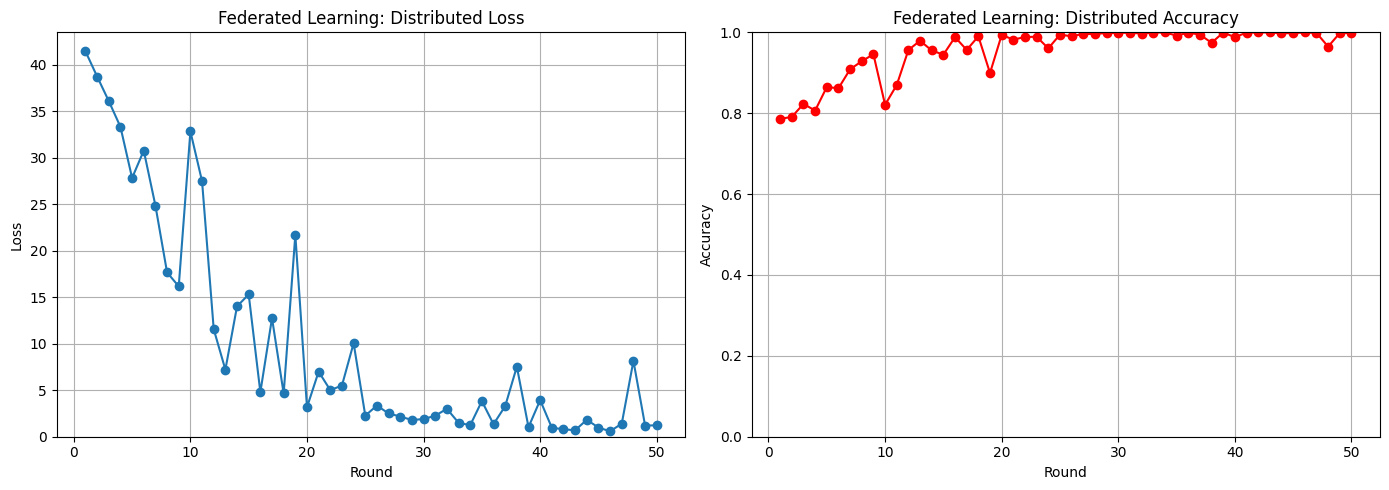

In [18]:
import matplotlib.pyplot as plt

# --- 1. Manually Re-create the Data from Your Logs ---
# Since the 'history' variable is lost, we just copy the data you provided.

losses_distributed = [
    (1, 41.41958267202659), (2, 38.71160031346409), (3, 36.0722292276645),
    (4, 33.3036432976806), (5, 27.8092985019148), (6, 30.749499616894667),
    (7, 24.842165493971812), (8, 17.655610983191476), (9, 16.160776952706854),
    (10, 32.81632145827637), (11, 27.46113764984372), (12, 11.561312144617862),
    (13, 7.207995216537461), (14, 14.014863538117325), (15, 15.293251572357375),
    (16, 4.78037853765953), (17, 12.742960197518972), (18, 4.650101977353483),
    (19, 21.70229120870254), (20, 3.1644246197027117), (21, 6.998078886249243),
    (22, 5.003111870535253), (23, 5.503196107054434), (24, 10.05351446174949),
    (25, 2.267550808051107), (26, 3.3507429022997473), (27, 2.498205917403101),
    (28, 2.170213399698727), (29, 1.796418572271517), (30, 1.9013460546868766),
    (31, 2.254323671326717), (32, 3.004819157202412), (33, 1.4998536458237532),
    (34, 1.233985642787902), (35, 3.825593500953157), (36, 1.348997888393125),
    (37, 3.286376601600191), (38, 7.527497084128612), (39, 1.027089352542111),
    (40, 3.9344221724004935), (41, 0.9713808035232667), (42, 0.7983347901949421),
    (43, 0.6955035247250235), (44, 1.8198824599370111), (45, 0.9845723164473001),
    (46, 0.5809238134005044), (47, 1.4089192368519767), (48, 8.152590874995939),
    (49, 1.201807367238861), (50, 1.2241123671880616)
]

metrics_distributed = {
    'accuracy': [
        (1, 0.7859180997917792), (2, 0.790930824400401), (3, 0.8229351430554485),
        (4, 0.8065859489473278), (5, 0.8646564355672091), (6, 0.8617259196421686),
        (7, 0.9086141744428163), (8, 0.9285108351970386), (9, 0.945785455386751),
        (10, 0.820852934371867), (11, 0.8697462790159636), (12, 0.9562736176447906),
        (13, 0.9792550320043186), (14, 0.955116835042801), (15, 0.9447829104650266),
        (16, 0.9881236986195727), (17, 0.9565049741651885), (18, 0.9901287884630215),
        (19, 0.899359913626899), (20, 0.9935220174288578), (21, 0.9820313102490938),
        (22, 0.9884321739801033), (23, 0.9891262435412972), (24, 0.9603609161718207),
        (25, 0.9943703246703169), (26, 0.9902059073031542), (27, 0.9962211768335004),
        (28, 0.9956813449525719), (29, 0.9986118608776124), (30, 0.9984576231973471),
        (31, 0.9991516927585409), (32, 0.9968381275545616), (33, 0.9993830492789388),
        (34, 0.9996915246394694), (35, 0.991979640626205), (36, 0.9989974550782756),
        (37, 0.9945245623505823), (38, 0.9741651885555641), (39, 0.9992288115986736),
        (40, 0.9882779362998381), (41, 0.9990745739184083), (42, 0.9996915246394694),
        (43, 0.999768643479602), (44, 0.9975321971157554), (45, 0.9982262666769491),
        (46, 0.9996144057993368), (47, 0.9986118608776124), (48, 0.9646795712192489),
        (49, 0.9981491478368165), (50, 0.9984576231973471)
    ]
}


# --- 2. Extract Data from the variables above ---
loss_rounds = [round_num for round_num, loss in losses_distributed]
losses = [loss for round_num, loss in losses_distributed]

acc_rounds = [round_num for round_num, acc in metrics_distributed['accuracy']]
accuracies = [acc for round_num, acc in metrics_distributed['accuracy']]


# --- 3. Create the Plots ---
plt.figure(figsize=(14, 5))

# Plot 1: Loss vs. Round
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(loss_rounds, losses, marker='o', linestyle='-')
plt.title('Federated Learning: Distributed Loss')
plt.xlabel('Round')
plt.ylabel('Loss')
plt.grid(True)
plt.ylim(bottom=0) # Start y-axis at 0

# Plot 2: Accuracy vs. Round
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(acc_rounds, accuracies, marker='o', linestyle='-', color='r')
plt.title('Federated Learning: Distributed Accuracy')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.grid(True)
plt.ylim(0, 1) # Accuracy is between 0 and 1

plt.tight_layout() # Prevents plots from overlapping
plt.show()

In [ ]:
import torch
from flwr.common import parameters_to_ndarrays

# Extract the final parameters safely
final_parameters = server.parameters  # ← global model weights are here

# Convert them to PyTorch tensors
model = MRI_CNN().to(device)
params_dict = zip(model.state_dict().keys(), parameters_to_ndarrays(final_parameters))
state_dict = {k: torch.tensor(v) for k, v in params_dict}
model.load_state_dict(state_dict, strict=True)

# Save it to disk
torch.save(model.state_dict(), "final_global_model.pth")
print("✅ Model saved as 'final_global_model.pth'")


✅ Model saved as 'final_global_model.pth'


In [ ]:
import torch

model = MRI_CNN().to(device)
model.load_state_dict(torch.load("final_global_model.pth"))
model.eval()
print("✅ Model loaded and ready for evaluation!")


✅ Model loaded and ready for evaluation!


In [6]:
# ===== Imports (for safety) =====
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import transforms
import pandas as pd
from PIL import Image

# ===== CNN Model Definition =====
class MRI_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(MRI_CNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.block3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.MaxPool2d(2),
        )
        self.block4 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
        )
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)


# ===== Dataset Class Definition =====
class MRIDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, transform=None):
        self.data = pd.read_csv(csv_path)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label_map = {
            "Non Demented": 0,
            "Very mild Dementia": 1,
            "Mild Dementia": 2,
            "Moderate Dementia": 3,
        }
        return image, label_map[label]


# ===== Transform Definition =====
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3),
    ]
)

# ===== Device Definition =====
device = torch.device("cpu")

In [12]:
import pandas as pd
import os

# --- This combines all your client test sets ---

base_path = "/home/DSE423/Documents/FL Project/client_splits/splits"
num_clients = 10  # You have 10 clients
output_path = "/home/DSE423/Documents/FL Project/combined_global_test.csv"

# 1. Create a list of all client test file paths (using the corrected path)
test_csv_files = [f"{base_path}/client_{i+1}_test.csv" for i in range(num_clients)]

print("Attempting to load these files:")
print("\n".join(test_csv_files))

# 2. Load each CSV into a list of DataFrames
try:
    all_test_dfs = [pd.read_csv(f) for f in test_csv_files]
    
    # 3. Combine them into one big DataFrame
    combined_df = pd.concat(all_test_dfs)

    # 4. Save this new combined set to a file
    combined_df.to_csv(output_path, index=False)

    print(f"\nSuccessfully created combined global test set with {len(combined_df)} images.")
    print(f"File saved at: {output_path}")

except FileNotFoundError as e:
    print(f"\n--- ERROR ---")
    print(f"Still can't find the file: {e.filename}")
    print("Please go to your terminal and use the 'ls' command to confirm the exact name and path.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

Attempting to load these files:
/home/DSE423/Documents/FL Project/client_splits/splits/client_1_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_2_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_3_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_4_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_5_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_6_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_7_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_8_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_9_test.csv
/home/DSE423/Documents/FL Project/client_splits/splits/client_10_test.csv

Successfully created combined global test set with 12970 images.
File saved at: /home/DSE423/Documents/FL Project/combined_global_test.csv


Loaded test set with 12970 images.


Getting predictions: 100%|██████████| 811/811 [01:20<00:00, 10.02it/s]


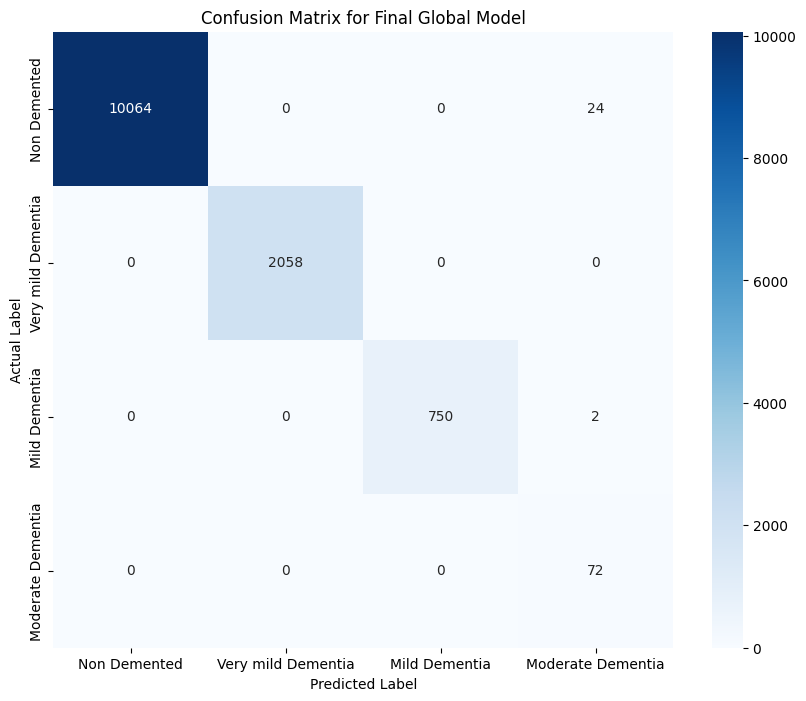

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader
from tqdm import tqdm # Make sure tqdm is imported

# --- 1. DEFINE YOUR TEST DATA PATH ---
#
# !! YOU MUST CHANGE THIS PATH !!
# This must be the path to your global test data .csv file.
# Your code doesn't create this file, you must have it from your dataset.
#
TEST_CSV_PATH = "/home/DSE423/Documents/FL Project/combined_global_test.csv"

# --- 2. CREATE A NEW TEST LOADER ---
# This code creates the 'test_loader' variable you need.
# It re-uses the MRIDataset class and transform you already defined.
try:
    test_dataset = MRIDataset(TEST_CSV_PATH, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
    print(f"Loaded test set with {len(test_dataset)} images.")
except FileNotFoundError:
    print(f"ERROR: Could not find your test file at '{TEST_CSV_PATH}'.")
    print("Please update the TEST_CSV_PATH variable in this cell.")
except Exception as e:
    print(f"An error occurred loading the dataset: {e}")


# --- 3. LOAD THE FINAL GLOBAL MODEL ---
model = MRI_CNN().to(device)
model_path = "/home/DSE423/Documents/FL Project/final_global_model.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # Set the model to evaluation mode


# --- 4. GET PREDICTIONS ---
all_labels = []
all_preds = []

# Now we use the 'test_loader' we just created
if 'test_loader' in locals():
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc="Getting predictions"):
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


# --- 5. PLOT THE CONFUSION MATRIX ---
if all_labels:
    cm = confusion_matrix(all_labels, all_preds)

    # These class names MUST match the order of your label_map
    class_names = ['Non Demented', 'Very mild Dementia', 'Mild Dementia', 'Moderate Dementia']

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.title('Confusion Matrix for Final Global Model')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
else:
    print("Could not plot confusion matrix. No test data was processed.")